<a href="https://colab.research.google.com/github/niranjan216/Time-Series-Analysis---Lab/blob/main/Linear_regression_for_time_series_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/content/AirPassengers.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
passengers = pd.read_csv('/content/AirPassengers.csv')
passengers.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
new_columns = ['Date', 'Passengers']
passengers.columns = new_columns
passengers.head()

,Date,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
date_column = passengers['Date']
new_values = []
for value in date_column:
    new_value = value[:4]
    new_values.append(new_value)

passengers['Date'] = new_values
passengers.head()

,Date,Passengers
0,1949,112
1,1949,118
2,1949,132
3,1949,129
4,1949,121


In [6]:
groupby_passengers = passengers.groupby(by='Date').sum()

In [7]:
groupby_passengers = passengers.groupby(by='Date').sum()

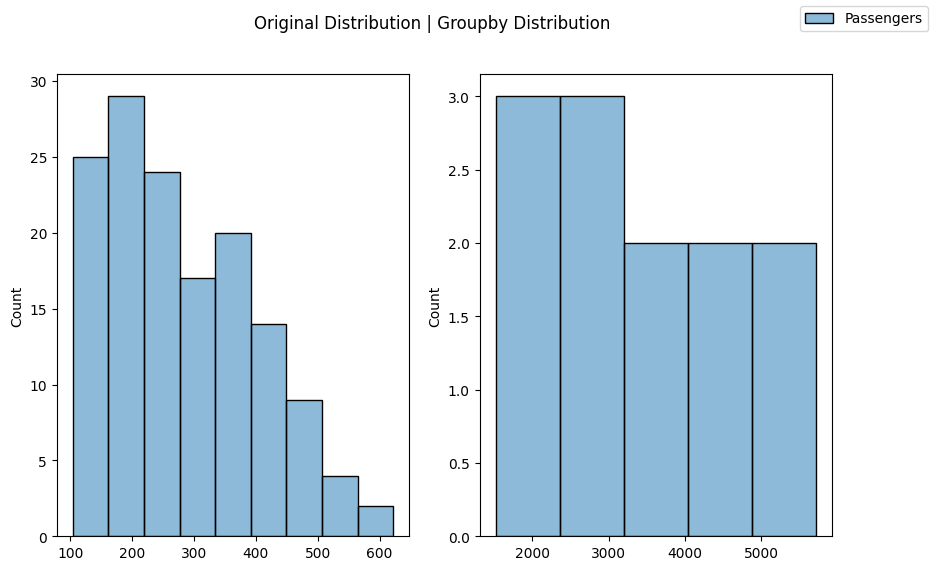

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
sns.histplot(data=passengers, ax=ax1, legend='')
sns.histplot(data=groupby_passengers, ax=ax2, legend='')
plt.suptitle('Original Distribution | Groupby Distribution')
fig.legend(['Passengers'])
plt.show()

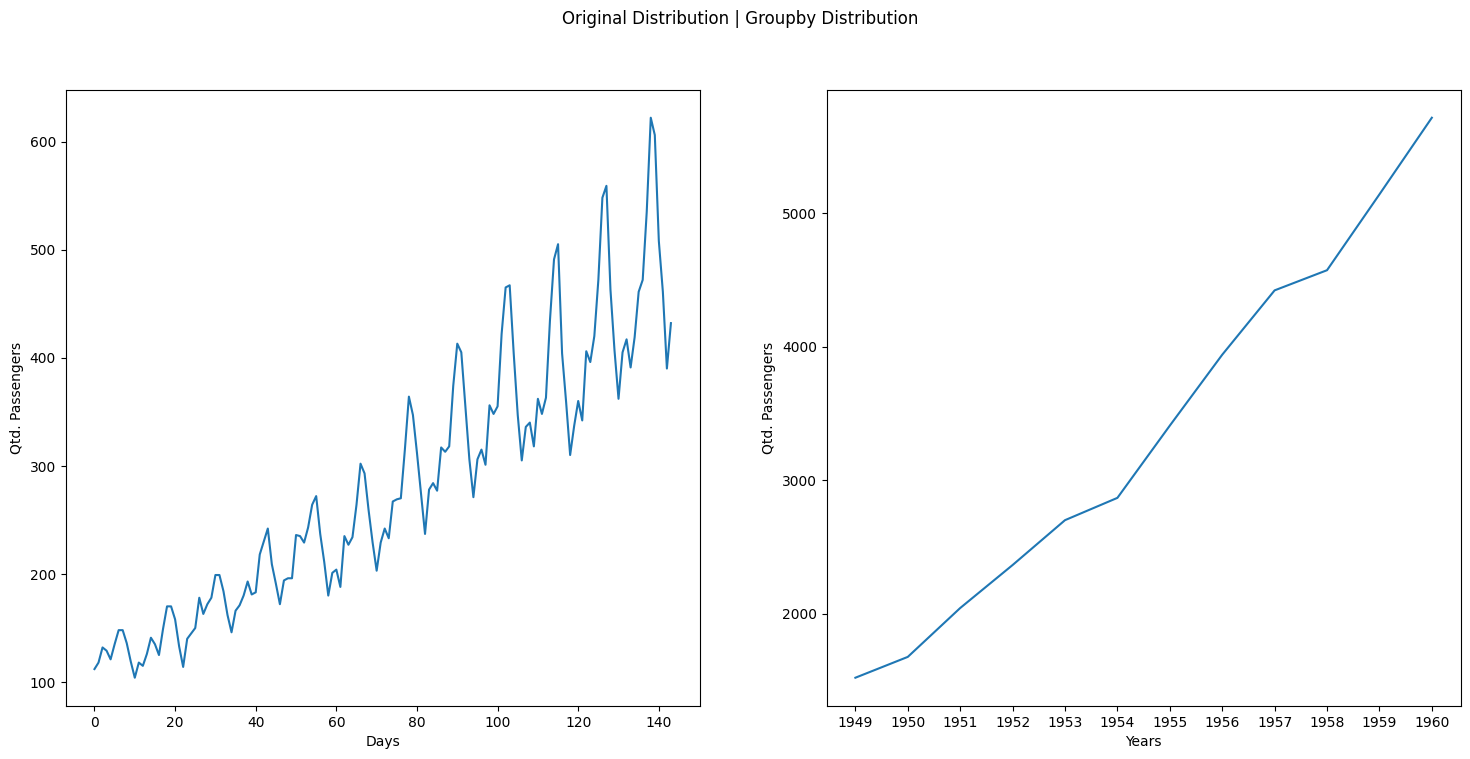

In [9]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
plt.suptitle('Original Distribution | Groupby Distribution')
ax1.plot(passengers['Passengers'])
ax1.set_xlabel('Days')
ax1.set_ylabel('Qtd. Passengers')
ax2.plot(groupby_passengers)
ax2.set_xlabel('Years')
ax2.set_ylabel('Qtd. Passengers')
plt.show()


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
x = groupby_passengers.index
x = np.array(x).reshape(-1, 1)

y = groupby_passengers['Passengers']

In [12]:
lm = LinearRegression()

In [16]:
lm.fit(x, y)

LinearRegression()

In [17]:
predict = lm.predict(x)

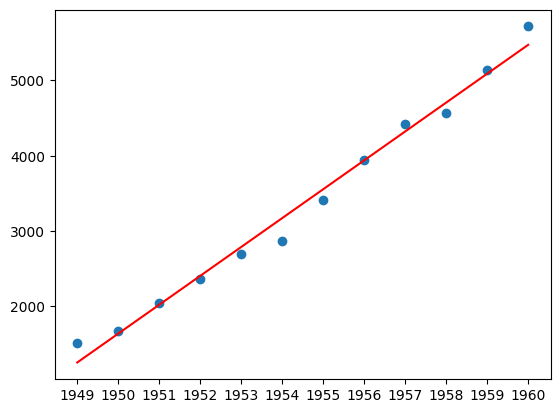

In [18]:
plt.scatter(groupby_passengers.index, y)
plt.plot(groupby_passengers.index, predict, color='r')
plt.show()

In [19]:
lm.score(x, y)

0.9866055381778157

In [20]:
lm.coef_[0]

383.0874125874125

In [21]:
lm.intercept_

-745380.7645687643

In [22]:
mse = mean_squared_error(y, predict)
rmse = np.sqrt(mse)
rmse

154.08704899323627